# Facial Recognition using Artificial Neural Network

Name: **Ashwin Sekhari** &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Roll Number: **117CS0263**

In order to apply ANN on face, we have to first extract unique features from face data, these unique features can be extracted based on the geometrical property of faces (face structure: like distance between eyes and nose , nose and lips etc) or based on the images we have (intensity values). For our implementation we will extract 100 features and work with them. 

The architecture consists of 3 layers, 1 input, 1 output and 1 hidden layer.

## Including libraries

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

## Helper Functions

In [2]:
def create_feature_vec(num_train) :  
    """
    
    Creating feature vector for images from training dataset.    
    
    """   
    feature_vector = []
    
    #Extracting features
    for i in range(1, 41) :
        folder_path = base_path + 's' + str(i) + '/'
        for j in range(1, num_train + 1) :
            img_path = folder_path + str(j) + '.pgm'
            im = Image.open(img_path)
            pix = im.load()

            img_row = []
            for x in range(lenx) :
                for y in range(leny) :
                    img_row.append(pix[x, y])
            #feature vector 
            feature_vector.append(img_row)

    feature_vector = np.array(feature_vector)
    feature_vector_T = np.transpose(feature_vector)
    return feature_vector

def create_eig_val_vec(cov_mat):
    """
        Eigenvvalues and Eigenvectors
    """
    eigen_val, eigen_vec = np.linalg.eig(cov_mat)
    eigen_val_s = np.sort(eigen_val)
    eigen_vec_s = eigen_vec[:, eigen_val.argsort()]
    eigen_vec_s = np.fliplr(eigen_vec_s)
    eigen_vec = eigen_vec_s
    eigen_val = eigen_val_s

    return eigen_val, eigen_vec

In [3]:
def create_test_matrix(num_train) :
    """
        Create the test matrix by reading the data from 'att_faces' base folder
    """
    test_mat = []
    for i in range(1, 41) : # for each folder
        folder_path = base_path + 's' + str(i) + '/'
        for j in range(num_train + 1, 11) :

            img_path = folder_path + str(j) + '.pgm'
            im = Image.open(img_path)
            pix = im.load()

            img_row = []
            for x in range(lenx) :
                for y in range(leny) :
                    img_row.append(pix[x, y])

            test_mat.append(img_row)

    test_mat = np.array(test_mat)
    print("Test matrix = ", test_mat)
    print("Shape of test matrix = ", test_mat.shape)
    print("\n")
    return test_mat  

def create_mean_zero_test(test_mat, mean) :
    """
        Mean zero values for the test matrix
    """
    dev_test_mat = test_mat - mean
    dev_test_mat_T = np.transpose(dev_test_mat)
    return dev_test_mat, dev_test_mat_T

def get_actual_values(num_test) :
    """
        Actual values for verification process
    """
    actual_vec = list(range(40))
    actual_vec = np.array([ele for ele in actual_vec for i in range(num_test)])
    print("\nActual expected values\n")
    print(actual_vec)
    print("\nShape of actual output = {}\n".format(actual_vec.shape))
    return actual_vec

def accuracy(prediction, y):
    """
        Helps in finding the accuracy, takes input as prediction and actual values
    """
    count = 0
    for i in range((len(y))) :
        if prediction[i] == y[i] :
            count += 1
    return (count / len(y)) * 100

In [4]:
def calculate_loss(model):
    """
        Calculating loss incurred because of the model
    """
    # model parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    
    # Add regulatization term to loss (optio
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

def predict(model, x):
    """
        Helper function to predict the labels
    """
    # model parameters
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    
    #a1 = np.exp(z1) / 1 + np.exp(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

def build_model(nn_hdim, epochs=22000, print_loss=False):
    """
        Builds the model
    """
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, epochs):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if print_loss and i % 5000 == 0:
            loss = calculate_loss(model)
    
    return model

## Main


In [5]:
base_path = 'att_faces/'
img=cv2.imread(base_path + 's1/1.pgm')
leny, lenx, z = img.shape

k = 100 # number of features to be taken from PCA

# number of images in training and test classes
num_train = 6
num_test = 10 - num_train

C = 40 # number of classes/folders

#Feature vector
feature_vec = create_feature_vec(num_train)

In [6]:
#Mean, deviation and covariance matrices 
mean_vec = np.mean(feature_vec, axis = 0)
dev_mat = feature_vec - mean_vec
cov_mat = np.dot(dev_mat, dev_mat.T)

#Eigen values and vectors
eigen_val, eigen_vec = create_eig_val_vec(cov_mat)

In [7]:
#Direction feature vectors
dec_feature_vec = eigen_vec[:, :k] #Selecting best k directions
eig_face = np.dot(np.transpose(dec_feature_vec), dev_mat) #eigen faces
sig_face = np.dot(eig_face, dev_mat.T) #Signing eigen faces
sig_face = sig_face.T

#Creating test matrix for testing purposes
test_mat = create_test_matrix(num_train)

Test matrix =  [[ 41  44  48 ...  35  33  38]
 [ 44  44  41 ...  37  32  37]
 [ 42  41  54 ...  40  39  41]
 ...
 [125 121 122 ...  43  35  40]
 [119 118 120 ...  88  92  85]
 [125 124 121 ...  35  32  34]]
Shape of test matrix =  (160, 10304)




In [8]:
#Deviation test matrix
dev_test_mat, dev_test_mat_T = create_mean_zero_test(test_mat, mean_vec)

#Projected test faces
proj_test_face = np.dot(eig_face, dev_test_mat_T)

#Input and output for training and building the model
X = sig_face
y = list(range(C))
y = np.array([ele for ele in y for i in range(num_train)])

#Some constants
num_examples = len(X) # training set size
nn_input_dim = k # input dimension
nn_output_dim = C # output dimension

epsilon = 0.03 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [9]:
#Acctual output values
actual_vec = get_actual_values(num_test)


Actual expected values

[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11
 12 12 12 12 13 13 13 13 14 14 14 14 15 15 15 15 16 16 16 16 17 17 17 17
 18 18 18 18 19 19 19 19 20 20 20 20 21 21 21 21 22 22 22 22 23 23 23 23
 24 24 24 24 25 25 25 25 26 26 26 26 27 27 27 27 28 28 28 28 29 29 29 29
 30 30 30 30 31 31 31 31 32 32 32 32 33 33 33 33 34 34 34 34 35 35 35 35
 36 36 36 36 37 37 37 37 38 38 38 38 39 39 39 39]

Shape of actual output = (160,)



## Testing

In [10]:
hidden_layer_dimensions = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45 , 50]
acc_val = []
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    model = build_model(nn_hdim, print_loss=True)
    prediction = predict(model, proj_test_face.T)
    acc = accuracy(prediction, actual_vec)
    acc_val.append(acc)

## Accuracy vs nodes in hidden layer

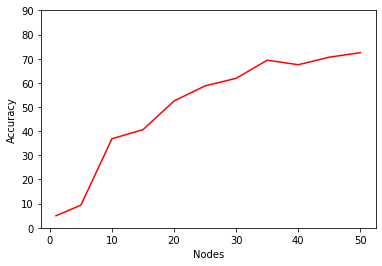

In [11]:
plt.plot(hidden_layer_dimensions, acc_val, color = "Red")
plt.xlabel('Nodes')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 100, 10.0))
plt.show()